In [1]:
#  Machine Learning for Stock Trading - Course by Genbox Gaming on Udemy

#Step 1: Obtaining Historical Data

# importing the packages for this task 

import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import datetime 
from datetime import date,time

#Yahoo data 
import yfinance as yf 
from yahoofinancials import YahooFinancials 

import warnings
warnings.filterwarnings("ignore")


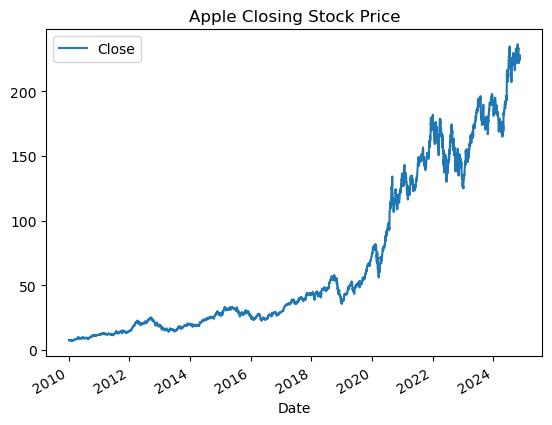

In [2]:
#Download the Historical Data. 

#Dataframe where the data is downloaded 
# We have used up to 15 years of data to avoid overfitting the model. 
df = yf.download("AAPL", 
                start= "2010-01-01",
                end = date.today(), 
                progress = False)

#Create a chart 
#Data frame contains Open, High, Low, Close, Adj Close, Volume 
#We want to plot the Close price on Y-axis and Date on X

df.plot(y="Close", title="Apple Closing Stock Price")
plt.show()

,Open,High,Low,Close,Adj Close,Volume,RSI(2),RSI(7),RSI(14),CCI(30),CCI(50),CCI(100)
Date,,,,,,,,,,,,
2010-05-26,8.931429,9.004643,8.705357,8.718214,7.354227,850654000,38.355163,41.457509,45.711120,-56.178575,5.938006,69.276664
2010-05-27,8.950000,9.067500,8.896786,9.048214,7.632594,666282400,88.107545,57.073471,53.064089,-13.311516,36.745689,85.860512
2010-05-28,9.263929,9.264286,9.048214,9.174286,7.738940,815614800,92.643850,61.634753,55.541488,21.097389,61.682818,98.414024
2010-06-01,9.274643,9.497857,9.248571,9.315357,7.857944,876472800,96.031538,66.308343,58.200193,61.746178,92.576151,113.435571
2010-06-02,9.447857,9.457143,9.297500,9.426786,7.951938,688548000,97.702794,69.708792,60.223610,66.720387,95.928354,114.272333


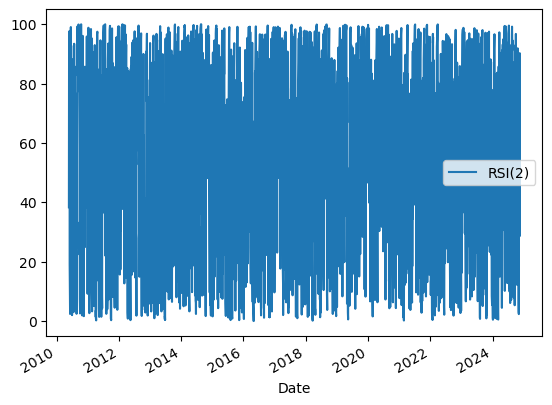

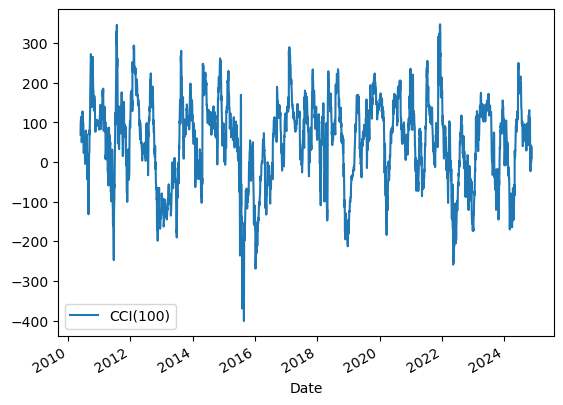

In [3]:
# Step 2: Creating Technical Analysis Indicators + Plot them

try: 
    import pandas_ta as ta #pandas technical analysis lib - lets us call any technical analysis indicator w/o needing formula 
except:
    !pip install -q pandas_ta
    import pandas_ta as ta

#creating new columns in our dataframe that are RSI indicators
#Here the 'ta' library from pandas will generate the rsi indicator for us using the closing data column from our dataframe. 

df['RSI(2)'] = ta.rsi(df['Close'], length = 2)
df['RSI(7)'] = ta.rsi(df['Close'], length = 7)
df['RSI(14)'] = ta.rsi(df['Close'], length = 14)

#Adding CCI indicators to the dataframe
# Taking the parameters the function requires. 

df['CCI(30)'] = ta.cci(close=df['Close'], length = 30, high=df["High"], low=df["Low"])
df['CCI(50)'] = ta.cci(close=df['Close'], length = 50, high=df["High"], low=df["Low"])
df['CCI(100)'] = ta.cci(close=df['Close'], length = 100, high=df["High"], low=df["Low"])

# Drop the NaN values - i.e., clean the data from zero/ non-valued data

df = df.dropna()

# Now we create a plot showing the indicators 

df.plot(y="RSI(2)")
df.plot(y="CCI(100)")

#Check how current data frame looks 

df.head()


In [4]:
# Step 3: We now want to label the data 

# we want to buy at market open (buy the next data open)
# we want to close our trade the day after at open.

# Formula: Buy: Open(-1) - Closing: Open(-2)

# We want a buy signal if: Open(-2) > Open(-1)
# We want to sell if: Open(-2) < Open(-1)

# Our labels take a look ahead of time to determine if we have a pattern

# Creating a label in the df. using the numpy if-else statement that says: 
        # If the condition is true, it assigns “1”.
        # If the condition is false, it assigns “0”.

# np.where(condition, value_if_true, value_if_false).

# The shift command is pulling back the values in future rows into the current row that is being looked at. E.g., shift.(-n) 
# applied to row 0 of open price data will take the opening price n rows ahead (in row n) and bring it into row 0. 

# The code below is taking the values in the open column and shifting them backwards by 2 steps. It is then comparing whether this value
# greater than - given by the method .gt() - the same values shifted back 1 step. 

# If it it true, it labels it 1 and if it is false, label it 0. 

# This part of the code is forward-looking as it uses future data to assign a label to the current row.
# It is checking if the opening price two days ahead(day 2) is greater than the opening price one day ahead (day 1) and, based on that, assigns the label.

# I can do this since the data that we have is already generated, so we are able to look into the future to determine our decision today

df['Label'] = np.where(df['Open'].shift(-2).gt(df['Open'].shift(-1)), "1", "0") 
df = df.dropna()
df.head()

# essentially, when we have a "1" label in the dataframe, it signals a winning trade. 
# By forward looking at the dataset, the labels tell us whether or not this technique worked based on the open prices being > or not. 

,Open,High,Low,Close,Adj Close,Volume,RSI(2),RSI(7),RSI(14),CCI(30),CCI(50),CCI(100),Label
Date,,,,,,,,,,,,,
2010-05-26,8.931429,9.004643,8.705357,8.718214,7.354227,850654000,38.355163,41.457509,45.711120,-56.178575,5.938006,69.276664,1
2010-05-27,8.950000,9.067500,8.896786,9.048214,7.632594,666282400,88.107545,57.073471,53.064089,-13.311516,36.745689,85.860512,1
2010-05-28,9.263929,9.264286,9.048214,9.174286,7.738940,815614800,92.643850,61.634753,55.541488,21.097389,61.682818,98.414024,1
2010-06-01,9.274643,9.497857,9.248571,9.315357,7.857944,876472800,96.031538,66.308343,58.200193,61.746178,92.576151,113.435571,1
2010-06-02,9.447857,9.457143,9.297500,9.426786,7.951938,688548000,97.702794,69.708792,60.223610,66.720387,95.928354,114.272333,0


In [5]:
#Step 4: The next step is training our Neural Network

# We need to import Sklearn to code the model 

import sklearn 
#import each dependency 
from sklearn.neural_network import MLPClassifier #type of neural network used for classification tasks, where the model tries to predict which category or class each input belongs to.
from sklearn.neural_network import MLPRegressor # Used for regression tasks where the goal is to predict a continuous value
from sklearn.model_selection import train_test_split # split the data up so the model is trained on part of the data and then tested on the rest, checking performance on unseen data. 
from sklearn.metrics import mean_squared_error # checks the accuracy of the model 
from math import sqrt
from sklearn.metrics import r2_score

# Fitting the indicators and labelling 

# For 'x' we are selecting the input data for model by selecting the indictor columns from the df. 
# We are selecting all the columns starting from index position 6 up to the second to last one.
# These columns are the indicators in the df, that the Neural Network will use to make predictions. 

x = df[df.columns[6:-1]].values 

# Next, we need to get the label column and assign them to y. These y values are what the Neural Network has to try and predict.
# These labels are used to tell the NN whether or not the prediction was correct during the training. \

y = df['Label'].values 

#Now we split the testing and training data:

    # Reserving 30% of the data to test -> x_test and y_test
    # And 70% is to train the model -> x_train and y_train

# Doing this helps the model not overfit the data.

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3) # From sklearn.model_selection

#### Creating the Neural Network ####

# the MLPClassifer initialises the Neural Network with the following parameters:

    # hidden_layer_sizes=(8,8,8) -> Creates a NN with 3 layers, each with 8 Neurons. 
    # activation="relu" -> sets the activation function to ReLU (Rectified Linear Unit) introduces non-linearity to the model and helps it learn more complex patterns.
    # solver="adam" -> This specifies the optimization algorithm, which helps the model update its weights during training. Adam is an adaptive optimizer. 
    # max_iter= 1000 -> This sets the maximum number of iterations (epochs) to 1000. During each iteration, the NN adjusts its weights based on the training data to minimize error.

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation="relu", solver="adam", max_iter= 1000)

# The code below trains the NN using the training data as inputs 
# The NN learns to map the input features (x_train) to the correct labels (y_train).

mlp.fit(x_train, y_train)

# The next code is used to make predictions on the training set. 
# The NN is predicting the labels for the same data it was trained on.
# Note that we still use the NN to predict the label for the training data too, as it was 
# only trained on this data to learn. 

# Now we are applying the Neural Network to the dataset: 

predict_train = mlp.predict(x_train)

# The next code is used to make predictions on the testing set. 
# The NN is predicting the labels for the new data it was not trained on.
predict_test = mlp.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

print("Train Data Accuracy")
print(classification_report(y_train, predict_train))

print("Testing Data Accuracy")
print(classification_report(y_test, predict_test))

#classification_report: This function provides detailed performance metrics for classification:
    # Precision: How many of the predictions for a class were correct.
	# Recall: How many of the actual instances of a class were correctly identified.
	# F1-Score: The harmonic mean of precision and recall, giving you a balanced measure of the two.
	# Accuracy: The overall percentage of correct predictions.
	# confusion_matrix: This generates a matrix that shows how many true positive, true negative, false positive, and false negative predictions the model made.


# So, overall what the Neural Network that we created is trying to do:

        # classify the data into labels '1' or '0'. 
        # predict whether the Label is “1” or “0” based on the technical indicators.
        # After training on 70% of the data, it makes predictions on both the training and testing sets. 
        # The classification report then evaluates how well it performed on each set, 
        # giving us an idea of the model’s accuracy and performance on unseen data.

Train Data Accuracy
              precision    recall  f1-score   support

           0       0.59      0.24      0.34      1178
           1       0.57      0.86      0.68      1373

    accuracy                           0.57      2551
   macro avg       0.58      0.55      0.51      2551
weighted avg       0.58      0.57      0.52      2551

Testing Data Accuracy
              precision    recall  f1-score   support

           0       0.51      0.23      0.32       502
           1       0.55      0.81      0.66       592

    accuracy                           0.54      1094
   macro avg       0.53      0.52      0.49      1094
weighted avg       0.53      0.54      0.50      1094



[]

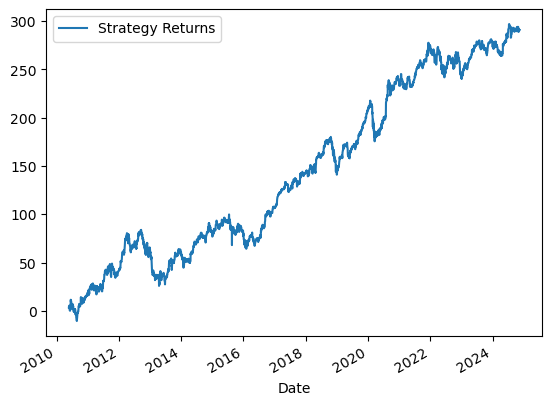

In [6]:
# Step 5: Backtesting our Model by measuring returns obtaining by trading

# This first code adds a column to the dataframe called 'Prediction' which 
# consists of the models predictions for the training set and the testing set
# This new column has the model prediction of whether the price will increase or not
# based on our strategy of buying tomorrow open and then selling the next day open

df["Prediction"] = np.append(predict_train, predict_test)

# Now we calculate the returns. 
# the np.where function is again acting like a if-else statement. 
# the condition is: 
    # the prediction = 1 i.e., the NN has assigned a label of 1 - it thinks the price will increase. 
    # If this is TRUE, the strategy assumes we buy the asset at the next day open 'df["Open"].shift(-1)'
# and then sell it the day after 'df["Open"].shift(-2)'. 
# So let's calculates the return of the Open price 2 days ahead and the Open price 1 day ahead (sell price and buy price)

# If the condition is FALSE, then the return is 0 as there is no trade made

df["Strategy Returns"] = np.where(df["Prediction"].eq("1"),((df["Open"].shift(-2)-df["Open"].shift(-1))/df["Open"].shift(-1)) *100,0)

# The strategy returns column now has the profit or loss made for each row when the Neural Network indicates a buy.

# Let's now calculate the cumulative sum of returns over time. 
# We are showing how the return over the entire period plays out 

#.cumsum() changes the strategy returns column values into the cummulative sum 
df["Strategy Returns"] = df["Strategy Returns"].cumsum()

# Plotting the cumulative return over time of the strategy based on the NN predictions.

df.plot(y = "Strategy Returns")
plt.plot()

In [7]:
# Step 5: Create a prediction for the next trading days

# The goal of this is to check if the strategy would have been profitable 

# Assigning the prediction value to 'prediction' variable.
# The -1 index refers to the last row in the DataFrame. 
# Since the DataFrame contains both historical data and predictions, 
# the last row will contain the most recent prediction from the model.

# ["Prediction"]: This extracts the value from the "Prediction" column 
# in the last row, which represents the model’s prediction for the last 
# available day of data.

prediction = df.iloc[-1]["Prediction"]

# creating an if-else statement to tell us what the model is predicting.
# It checks the value of the prediction variable made above. 
# If the prediction is "1", it assumes the model is forecastng the price to increase in the near future
# Else, it assumes a forecast of price decrease

# This only looks at the last trading day and outputs a forecast on what it could be.
 
if prediction == "1":
    print("Todays forecast is: Up")
else:
    print("Today's forecast is: Down")

Today's forecast is: Down
